#Praktikum Damin Modul2
### Rafi Fadhlillah
### 121450143

## Praktikum 1 : Data Integration.

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/PrakDamin/student.csv")
df2 = pd.read_csv("/content/drive/MyDrive/PrakDamin/mark.csv")

df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [ ]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [ ]:
df = pd.merge(df1, df2, on='Student_id')
df.head(10)

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


In [ ]:
df.to_csv("data_integration.csv")

## Praktikum 2 : Data Reduction.
Di praktikum ini, kita menggunakan 3 metode Reduksi Dimensi:

- Principal Component Analysis
- Singular Value Decomposition
- t-distributed Stochastic Neighbor Embedding

In [ ]:
! pip install ipython-autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00


In [ ]:
# load time of execution for each block
%load_ext autotime

time: 273 µs (started: 2023-09-29 01:44:25 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE

time: 1.8 s (started: 2023-09-29 01:44:25 +00:00)


# The Digits Dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
data = digits.images[0]

time: 408 µs (started: 2023-09-29 01:44:27 +00:00)


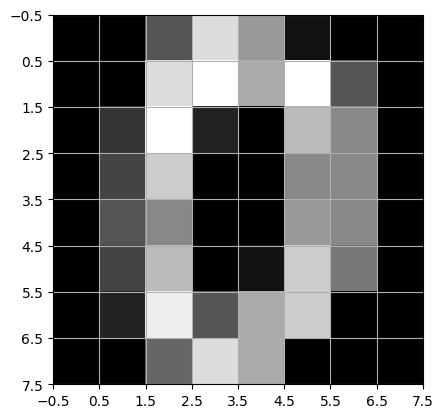

time: 227 ms (started: 2023-09-29 01:44:27 +00:00)


In [ ]:
#Display the first digit
plt.imshow(data, cmap = 'gray', interpolation='nearest')
plt.xticks(np.arange(-0.5, 8.5, 1))
plt.yticks(np.arange(-0.5, 8.5, 1))
plt.grid(True)
plt.show()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

time: 5.12 ms (started: 2023-09-29 01:44:27 +00:00)


In [ ]:
digits.images[0].shape

(8, 8)

time: 4.95 ms (started: 2023-09-29 01:44:27 +00:00)


In [ ]:
digits.data[0].shape

(64,)

time: 3.58 ms (started: 2023-09-29 01:44:27 +00:00)


In [ ]:
digitsX = digits.data
digitsY = digits.target

time: 686 µs (started: 2023-09-29 01:44:27 +00:00)


### PCA on the Digits Dataset - 2 Components

In [ ]:
pca2 = PCA(n_components = 2)
digits_pca2 = pca2.fit_transform(digitsX)

time: 74.6 ms (started: 2023-09-29 01:44:27 +00:00)


In [ ]:
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.14890594 0.13618771]
[567.0065665  542.25185421]
time: 5.85 ms (started: 2023-09-29 01:44:27 +00:00)


In [ ]:
digits_pca2 = pd.DataFrame(data = digits_pca2, columns = ['comp1', 'comp2'])
digits_pca2['label'] = digitsY

time: 6.28 ms (started: 2023-09-29 01:44:27 +00:00)


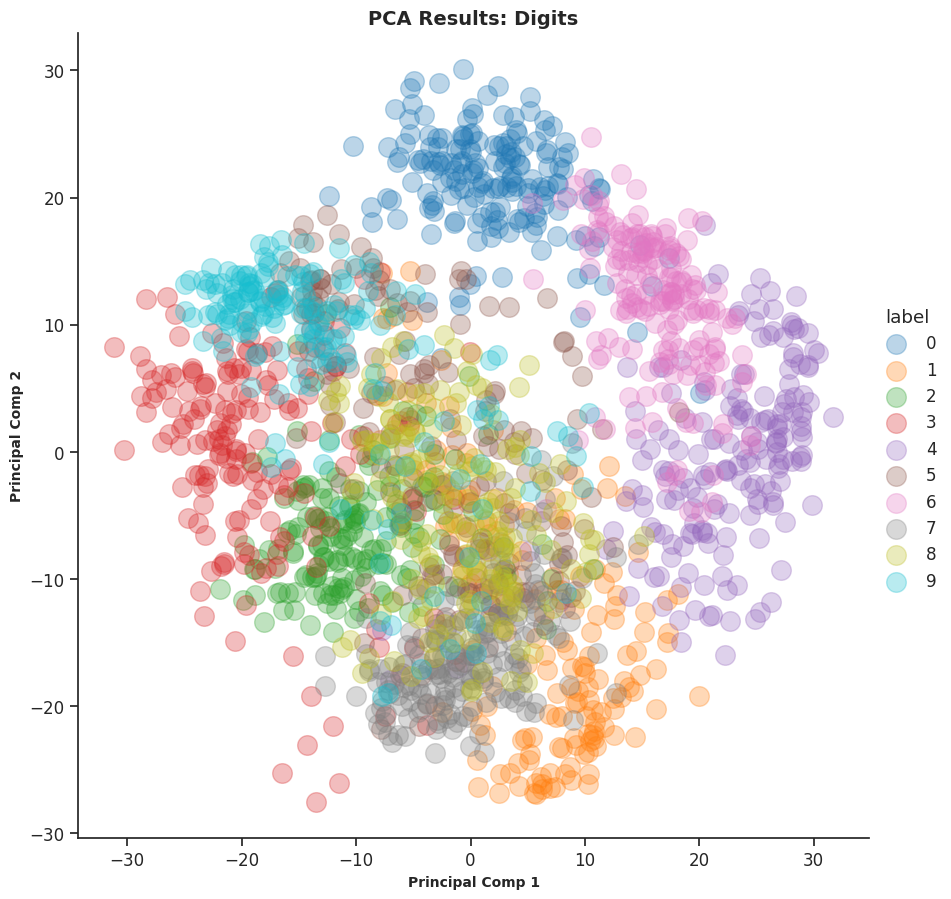

In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### SVD on Digits- 2 Components

In [ ]:
svd2 = TruncatedSVD(n_components = 2)

time: 1.28 s (started: 2023-09-29 01:44:27 +00:00)
time: 501 µs (started: 2023-09-29 01:44:28 +00:00)


In [ ]:
digits_svd2 = svd2.fit_transform(digitsX)

time: 25 ms (started: 2023-09-29 01:44:28 +00:00)


In [ ]:
digits_svd2 = pd.DataFrame(data = digits_svd2, columns = ['comp1', 'comp2'])
digits_svd2['label'] = digitsY

time: 1.9 ms (started: 2023-09-29 01:44:28 +00:00)


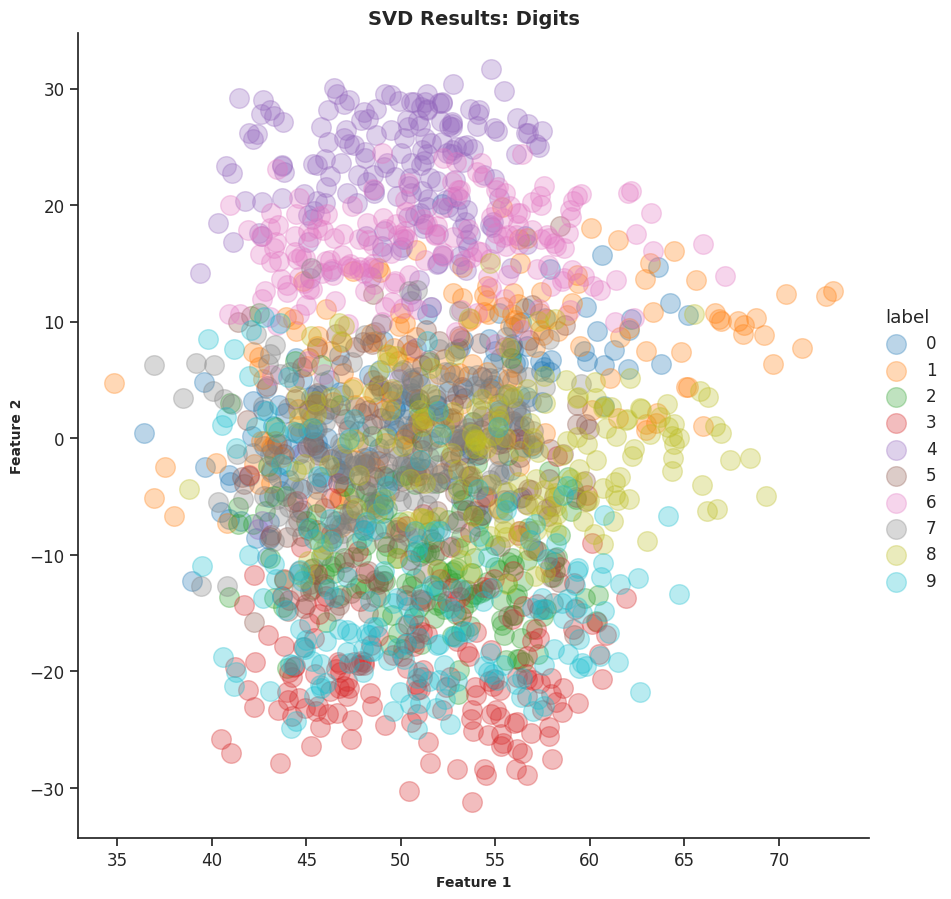

time: 1.25 s (started: 2023-09-29 01:44:28 +00:00)


In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_svd2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Feature 1', weight='bold').set_fontsize('10')
plt.ylabel('Feature 2', weight='bold').set_fontsize('10')

### TSNE on Digits - 2 Components

In [ ]:
tsne2 = TSNE(n_components = 2)
digits_tsne2 = tsne2.fit_transform(digitsX)

time: 30.9 s (started: 2023-09-29 01:44:30 +00:00)


In [ ]:
digits_tsne2 = pd.DataFrame(data = digits_tsne2, columns = ['comp1', 'comp2'])
digits_tsne2['label'] = digitsY

time: 4.73 ms (started: 2023-09-29 01:45:15 +00:00)


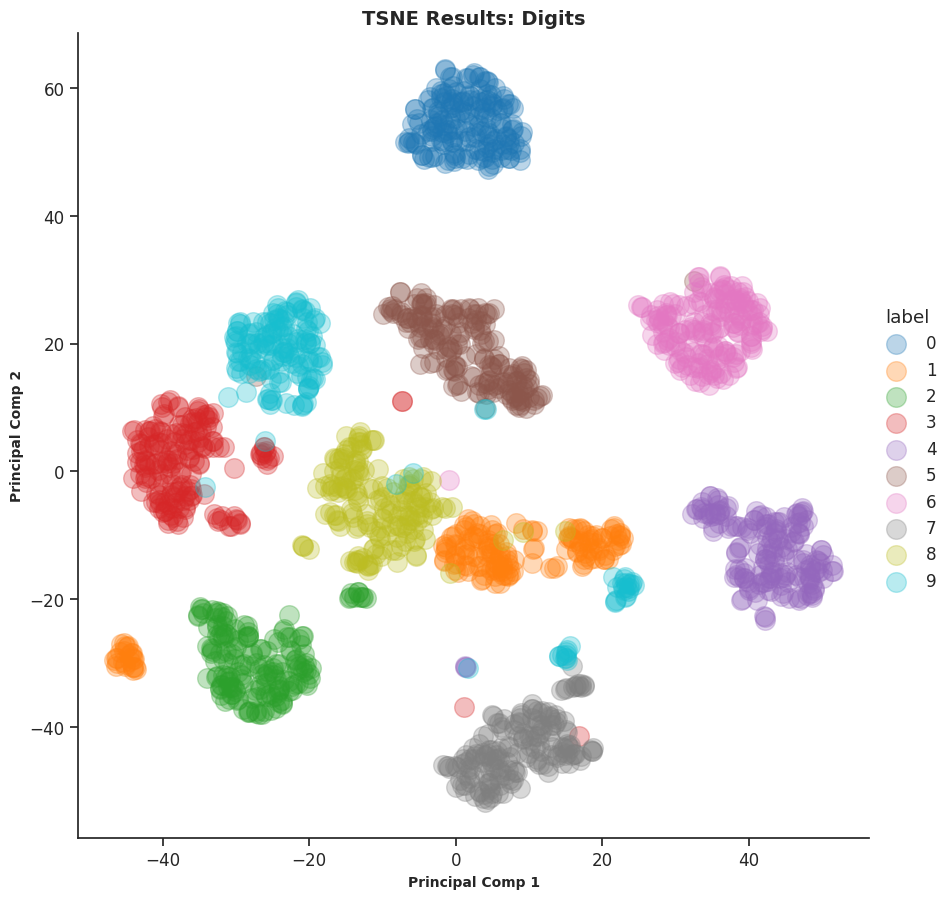

time: 1.55 s (started: 2023-09-29 01:45:22 +00:00)


In [ ]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_tsne2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### PCA on Digits - 3 Components

In [ ]:
pca3 = PCA(n_components = 3)
digits_pca3= pca3.fit_transform(digitsX)

time: 35 ms (started: 2023-09-29 01:45:45 +00:00)


In [ ]:
digits_pca3.shape

(1797, 3)

time: 23.5 ms (started: 2023-09-29 01:45:52 +00:00)


In [ ]:
digits_pca3 = pd.DataFrame(data = digits_pca3, columns = ['comp1', 'comp2', 'comp3'])
digits_pca3['label'] = digitsY

time: 5.11 ms (started: 2023-09-29 01:46:00 +00:00)


In [ ]:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

time: 421 µs (started: 2023-09-29 01:46:07 +00:00)


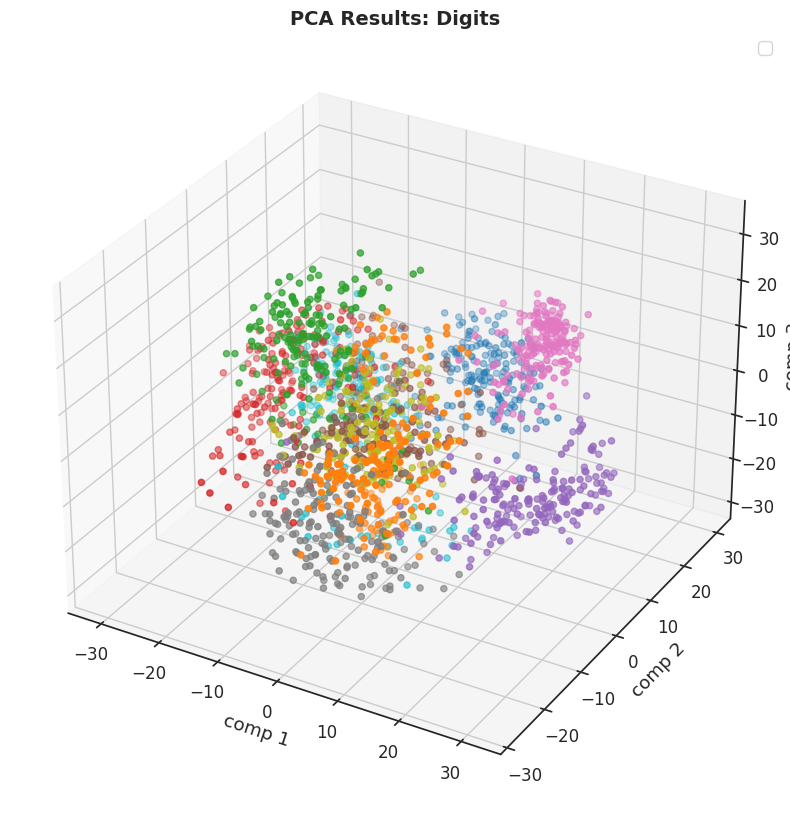

time: 505 ms (started: 2023-09-29 01:46:13 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'],
    ys=digits_pca3.loc[:, 'comp2'],
    zs=digits_pca3.loc[:, 'comp3'],
    c=digits_pca3.loc[:, 'label'],
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
ax.legend()
plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### SVD on Digits - 3 Components

In [ ]:
svd3 = TruncatedSVD(n_components = 3)

time: 576 µs (started: 2023-09-29 01:46:33 +00:00)


In [ ]:
digits_svd3 = svd3.fit_transform(digitsX)

time: 22.3 ms (started: 2023-09-29 01:46:39 +00:00)


In [ ]:
digits_svd3 = pd.DataFrame(data = digits_svd3, columns = ['comp1', 'comp2', 'comp3'])
digits_svd3['label'] = digitsY

time: 1.79 ms (started: 2023-09-29 01:46:45 +00:00)


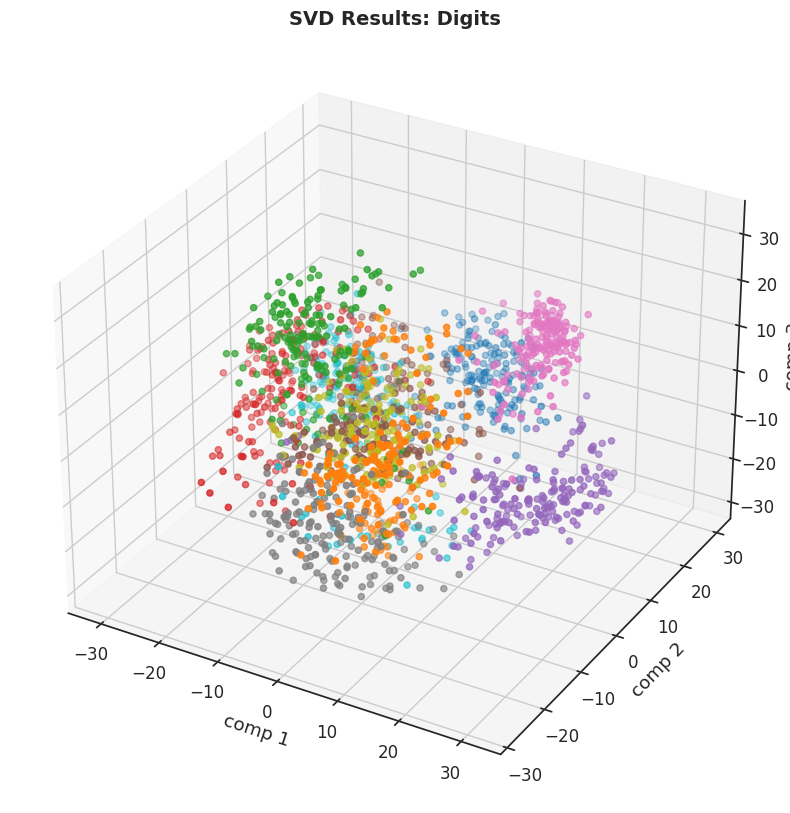

time: 533 ms (started: 2023-09-29 01:46:52 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'],
    ys=digits_pca3.loc[:, 'comp2'],
    zs=digits_pca3.loc[:, 'comp3'],
    c=digits_pca3.loc[:, 'label'],
    cmap='tab10',
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### TSNE on Digits - 3 Components

In [ ]:
tsne3 = TSNE(n_components = 3)
digits_tsne3 = tsne3.fit_transform(digitsX)

time: 41.6 s (started: 2023-09-29 01:47:32 +00:00)


In [ ]:
digits_tsne3 = pd.DataFrame(data = digits_tsne3, columns = ['comp1', 'comp2', 'comp3'])
digits_tsne3['label'] = digitsY

time: 1.89 ms (started: 2023-09-29 01:48:13 +00:00)


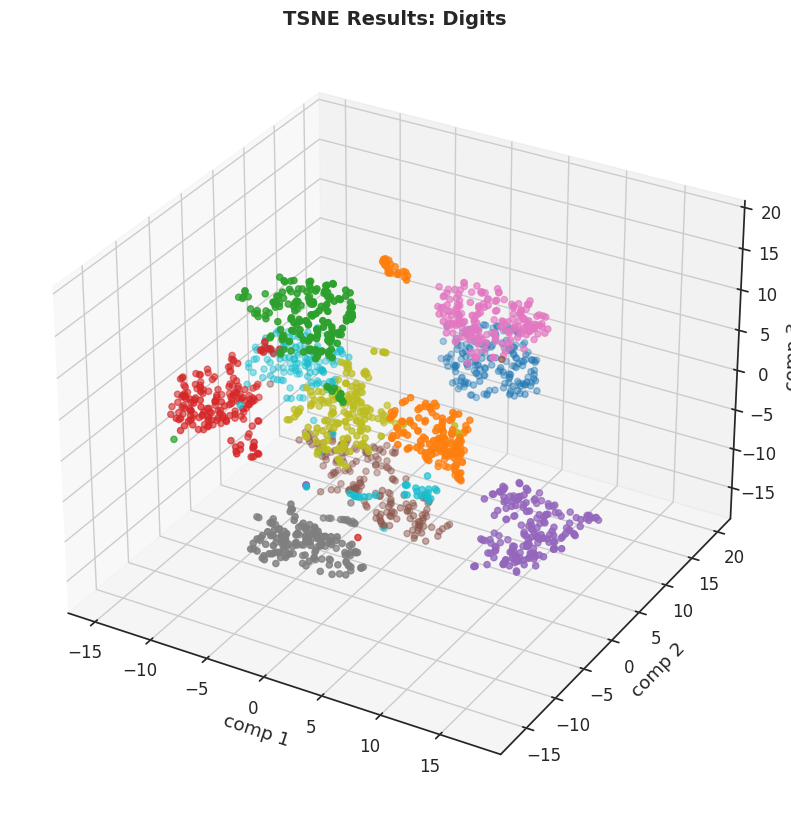

time: 402 ms (started: 2023-09-29 01:48:20 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_tsne3.loc[:, 'comp1'],
    ys=digits_tsne3.loc[:, 'comp2'],
    zs=digits_tsne3.loc[:, 'comp3'],
    c=digits_tsne3.loc[:, 'label'],
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.show()

## Praktikum 3 : Data Transformation and Data Discretization.

### Encoding

In [ ]:
import numpy as np

df_student = pd.read_csv("/content/drive/MyDrive/PrakDamin/student.csv")

time: 6.22 ms (started: 2023-09-29 01:51:50 +00:00)


Temukan categorical column dan pisahkan dengan dataframe yang berbeda. Untuk
melakukannya, gunakan fungsi select_dtypes() dari pandas:

In [ ]:
dfstudent_categorical = df_student.select_dtypes(exclude=[np.number])
dfstudent_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


time: 37.8 ms (started: 2023-09-29 01:53:24 +00:00)


Temukan unique values yang berbeda di kolom Grade. Untuk melakukannya,
gunakan fungsi unique() dari panda dengan nama kolom:


In [ ]:
dfstudent_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

time: 14.3 ms (started: 2023-09-29 01:55:43 +00:00)


Temukan distribusi frekuensi setiap kolom kategori. Untuk melakukannya, gunakan
fungsi value_counts() pada setiap kolom. Fungsi ini mengembalikan jumlah nilai
unik dalam suatu objek:


In [ ]:
dfstudent_categorical.Grade.value_counts()

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

time: 8.73 ms (started: 2023-09-29 01:56:23 +00:00)


In [ ]:
dfstudent_categorical.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

time: 16.8 ms (started: 2023-09-29 01:57:02 +00:00)


In [ ]:
dfstudent_categorical.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

time: 13.1 ms (started: 2023-09-29 01:57:23 +00:00)


Ganti entri di kolom Grade. Ganti kelas 1 dengan 1, kelas 2 dengan 2, dan kelas 3
dengan 3. Untuk melakukannya, gunakan fungsi replace():

In [ ]:
dfstudent_categorical.Grade.replace({"1st Class":1, "2nd Class":2, "3rd Class":3}, inplace=True)

time: 3.48 ms (started: 2023-09-29 02:05:44 +00:00)


Ganti entri di kolom Gender. Ganti Male dengan 0 dan Female dengan 1. Untuk
melakukannya, gunakan fungsi replace():


In [ ]:
dfstudent_categorical.Gender.replace({"Male":0, "Female":1}, inplace=True)

time: 842 µs (started: 2023-09-29 02:05:47 +00:00)


Ganti entri di kolom Employed. Ganti no dengan 0 dan yes dengan 1. Untuk
melakukannya, gunakan fungsi replace():


In [ ]:
dfstudent_categorical.Employed.replace({"yes":1, "no":0}, inplace=True)

time: 1.08 ms (started: 2023-09-29 02:05:49 +00:00)


Setelah semua penggantian tiga kolom selesai, kita perlu mencetak dataframe.
Tambahkan kode berikut:

In [ ]:
dfstudent_categorical.head()

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0


time: 5.98 ms (started: 2023-09-29 02:05:59 +00:00)


## simpan data csv

In [ ]:
dfstudent_categorical.to_csv("data_transformation_encoding.csv")

time: 3.37 ms (started: 2023-09-29 02:07:17 +00:00)


## Data Transformation (Label Encoding)

In [ ]:
import numpy as np

df_market = pd.read_csv("/content/drive/MyDrive/PrakDamin/Banking_Marketing.csv")

time: 398 ms (started: 2023-09-29 02:09:42 +00:00)


Sebelum melakukan encoding, hapus semua data yang hilang. Untuk
melakukannya, gunakan fungsi dropna():

In [ ]:
market_clean = df_market.dropna()

time: 137 ms (started: 2023-09-29 02:10:36 +00:00)


Pilih semua kolom yang bukan numerik menggunakan kode berikut:


In [ ]:
data_column_category = market_clean.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

time: 7.37 ms (started: 2023-09-29 02:11:58 +00:00)


Cetak lima baris pertama dataframe baru. Tambahkan kode berikut untuk
melakukan ini:

In [ ]:
market_clean[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


time: 40.2 ms (started: 2023-09-29 02:12:42 +00:00)


Ulangi kolom kategori ini dan ubah menjadi data numerik menggunakan
LabelEncoder(). Untuk melakukannya, impor paket sklearn.preprocessing dan
gunakan kelas LabelEncoder() untuk mengubah data:

In [ ]:
#import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

#Creating the object instance
label_encoder = LabelEncoder()

for i in data_column_category:
  market_clean[i] = label_encoder.fit_transform(market_clean[i])

print("Label Encoded Data: ")

market_clean.head()

Label Encoded Data: 


<ipython-input-63-1d67553a3a80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_clean[i] = label_encoder.fit_transform(market_clean[i])
<ipython-input-63-1d67553a3a80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_clean[i] = label_encoder.fit_transform(market_clean[i])
<ipython-input-63-1d67553a3a80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


time: 168 ms (started: 2023-09-29 02:19:06 +00:00)


## Simpan csv

In [ ]:
market_clean.to_csv("data_transformation_labeling_encoding.csv")

time: 557 ms (started: 2023-09-29 02:20:18 +00:00)


## Data Discretization

In [ ]:
std_bucket = pd.read_csv("/content/drive/MyDrive/PrakDamin/Student_bucketing.csv")
std_bucket.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


time: 42.7 ms (started: 2023-09-29 02:22:33 +00:00)


Lakukan pengelompokan menggunakan fungsi pd.cut() pada kolom marks dan
tampilkan 10 kolom teratas. Fungsi cut() mengambil parameter seperti x, bins,
and labels. Di sini, kita hanya menggunakan tiga parameter. Tambahkan kode
berikut untuk mengimplementasikan ini:

In [ ]:
std_bucket['bucket']= pd.cut(std_bucket['marks'], 5, labels=['Poor','Below_average', 'Average', 'Above_Average','Excellent'])
std_bucket.head(10)

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_Average
7,8,21,3rd Class,yes,70,Above_Average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average


time: 17.4 ms (started: 2023-09-29 02:27:09 +00:00)


## Simpan data csv


In [ ]:
std_bucket.to_csv("data_Discretization.csv")

time: 8.04 ms (started: 2023-09-29 02:28:08 +00:00)
